# Universal Approximation Theorem Example with Tensorflow and PyTorch

The [Universal Approximation Therorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) tells us that **Artificial Neural Networks** have the property of being able to find approximations for any mathematical function that maps data in the form of $y=f(x)$. This means that, given a function $f()$ that can take some input data $x$ and map it to an output $y$, no matter how many inputs and output for such function, **you can always find a complex enough neural network** that can approximate the given function $f()$.

In this notebook, I am going to present a simple example and implementation of such result in both Tensorflow/Keras and PyTorch, in order to understand this property of Artificial Neural Networks.

In this sense, let´s first create a synthetic dataset in which we know the underlying function that generates the data. For this, we are going to use the *Sinc* function, defined as:

$$sinc(x) = sin(x)/x$$

Then, let´s first import the neccesary Python libraries for now: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

And let´s create our data based on the previuos equation: 

In [2]:
# We create our data and corresponding mapped values
x = np.linspace(-25, 25, 1000)
y = [(math.sin(i)/i) for i in x if i!=0]

Now we plot the data to see the shape of the function:

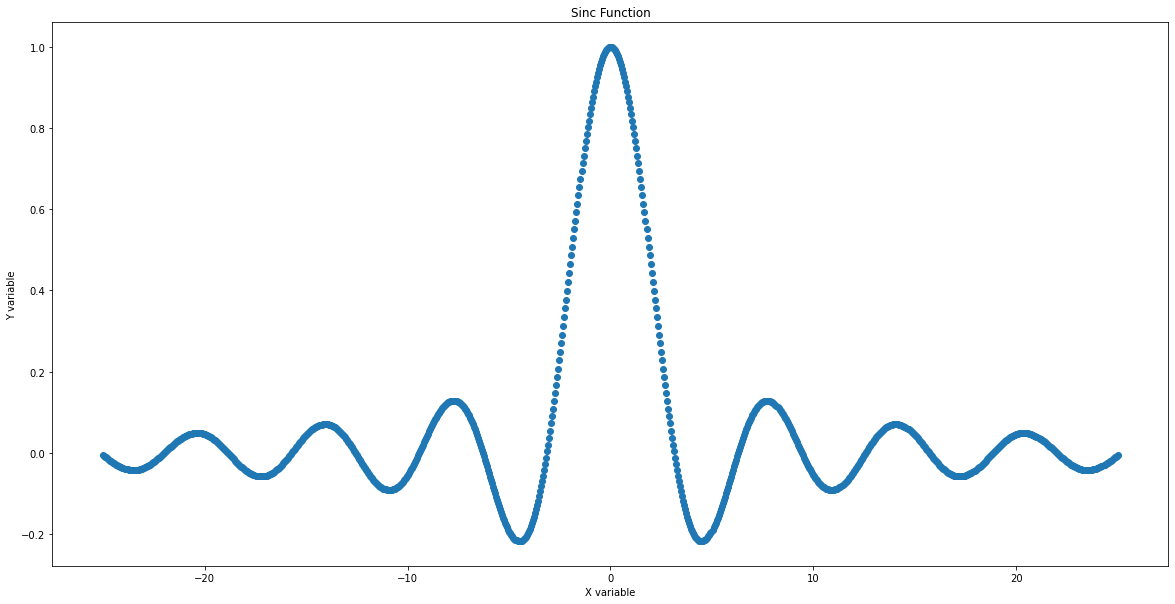

In [3]:
# Plot of sinc data points
plt.figure(figsize=[20, 10])
plt.scatter(x,y)
plt.title('Sinc Function')
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.show()

This plot shows us how the *Sinc* function oscilates around the center, and then decays as we go away from zero. This function in nonlinear and complex enough to serve as a good example for the approximation we want to achieve with the neural network.

Since we are going to input our data to our network, we are going to scale the input, but first we are going to convert our data to Numpy arrays and reshape it in order to have the inputs and outputs as matrices with shape (n_samples, n_features):

In [21]:
x = np.asarray(x)
y = np.asarray(y)
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [5]:
# We can check the shape of the data
x.shape, y.shape

((1000, 1), (1000, 1))

In [24]:
# We are going to use MinMaxScaling from scikit-learn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

Now that we have or data prepared, let´s implement the neural networks.

## Tensorflow/Keras Implementation

For the Tensorflow implementation, we are going to use the Sequential Model. Let´s then import what is needed:

In [7]:
from keras.models import Sequential
from keras.layers import Dense

And then we are going to build a simple Multi Layer Perceptron model as a baseline:

In [8]:
# Baseline MLP model
baseline_model = Sequential()
baseline_model.add(Dense(256, input_dim=1, activation='relu'))
baseline_model.add(Dense(128, activation='relu'))
baseline_model.add(Dense(1))

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               512       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33,537
Trainable params: 33,537
Non-trainable params: 0
_________________________________________________________________


Now we compile the model, setting the MSE loss function and the Adam optimizer, and then fit the model to the data:

In [9]:
# Compile of the baseline model and fit
baseline_model.compile(loss='mse', optimizer='adam')

n_epochs = 500
baseline_model.fit(x_scaled, y, epochs=n_epochs, verbose=1)

Epoch 1/500
32/32 [==============================] - 5s 3ms/step - loss: 0.0596
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0571
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0449
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0440
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0425
Epoch 11/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0418
Epoch 12/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0408
Epoch 13/500
32/32 [=================

Now we can make predictions of the training data using our model in order to see how good of an approximation of the original function we get:

In [10]:
y_predicted_baseline = baseline_model.predict(x_scaled)

32/32 [==============================] - 0s 1ms/step


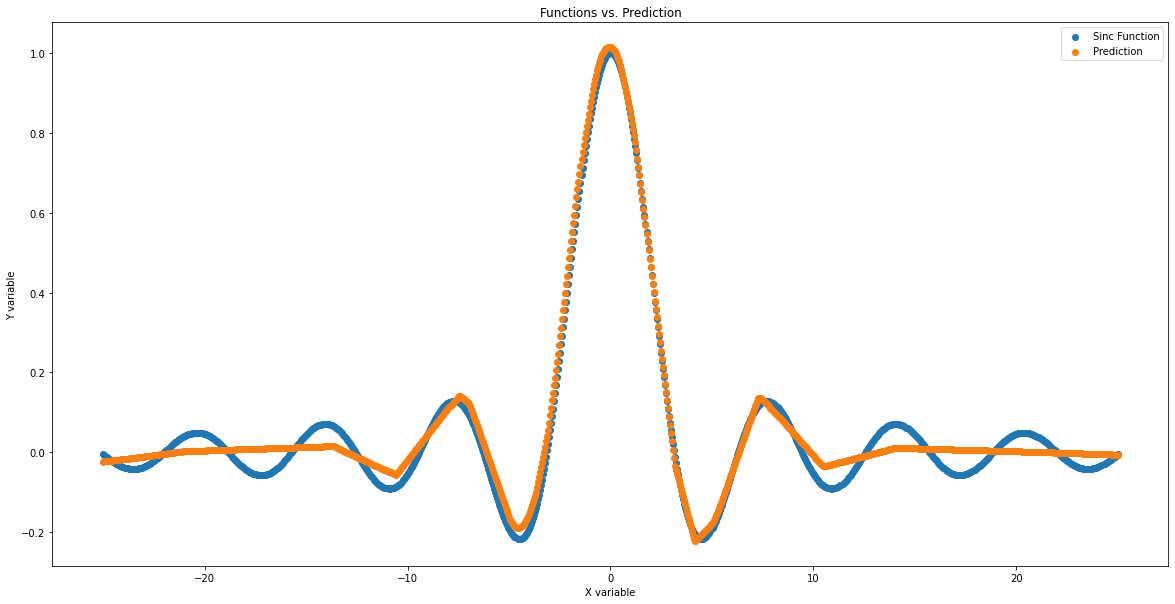

In [35]:
# Lets plot the training data and the predictions
plt.figure(figsize=[20, 10])
plt.scatter(x, y, label='Sinc Function')
plt.scatter(x, y_predicted_baseline, label='Prediction')
plt.title('Functions vs. Prediction')
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.legend()
plt.show()

And we can also evaluate the model using the same training data:

In [12]:
baseline_score = baseline_model.evaluate(x_scaled, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0011


From the result, we can see that even when the final loss of the model is very small, the neural network gives a good result of approximating the original *Sinc* function only for the region of values very close to zero, and as the values go higher or smaller into the oscillating values, it cannot reproduce the shape of the function. Now, let´s now create a second neural network that is considerably more deep and complex:

In [13]:
# More Complex Model
complex_model = Sequential()
complex_model.add(Dense(256, input_dim=1, activation='relu'))
complex_model.add(Dense(256, activation='relu'))
complex_model.add(Dense(128, activation='relu'))
complex_model.add(Dense(128, activation='relu'))
complex_model.add(Dense(64, activation='relu'))
complex_model.add(Dense(64, activation='relu'))
complex_model.add(Dense(64, activation='relu'))
complex_model.add(Dense(32, activation='relu'))
complex_model.add(Dense(32, activation='relu'))
complex_model.add(Dense(1))

complex_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               512       
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)               

In this case, we set more hidden layers with different amount of neurons in each one. Now we compile and fit the model:

In [14]:
complex_model.compile(loss='mse', optimizer='adam')

complex_model.fit(x_scaled, y, epochs=n_epochs, verbose=1)

Epoch 1/500
32/32 [==============================] - 3s 4ms/step - loss: 0.0587
Epoch 2/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0530
Epoch 3/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 4/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0381
Epoch 5/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0232
Epoch 6/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0195
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0295
Epoch 8/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 9/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 10/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 11/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 12/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 13/500
32/32 [=================

Now let´s predict with out new more complex neural network:

In [15]:
y_predicted_complex = complex_model.predict(x_scaled)

32/32 [==============================] - 0s 2ms/step


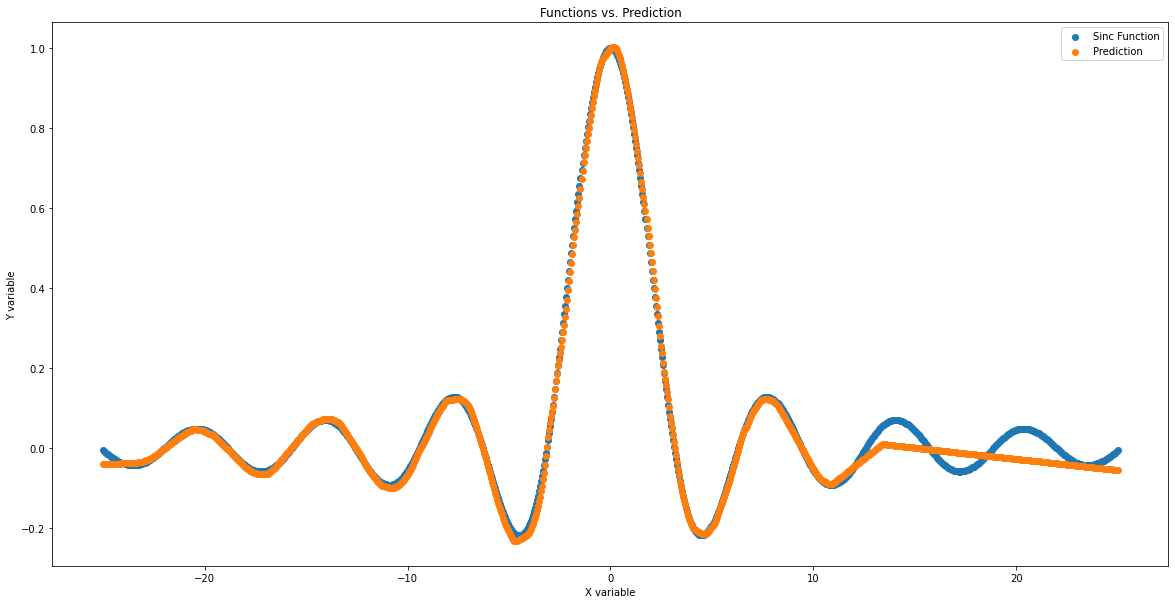

In [36]:
# Lets plot the training data and the predictions
plt.figure(figsize=[20, 10])
plt.scatter(x, y, label='Sinc Function')
plt.scatter(x, y_predicted_complex, label='Prediction')
plt.title('Functions vs. Prediction')
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.legend()
plt.show()

In [17]:
complex_model_score = complex_model.evaluate(x_scaled, y)

32/32 [==============================] - 0s 4ms/step - loss: 5.4187e-04


Given the plot, we can clearly see how now the neural network can reproduce (and then, approximate) more correctly the shape of the original function, and also that the final loss for this model is smaller than the baseline model. So, if we can build a model even more complex, with more hidden layers as well as more neurons in each layer, we are going to get even better results for the final predictions and approximation of the *Sinc* function. This is an example of the Universal Approximation Theorem for Artificial Neural Networks.

Let´s make the same excercise, now with PyTorch.

## PyTorch Implementation

In [18]:
import torch
import torch.nn as nn

In PyTorch, we need to convert our data to PyTorch tensors first:

In [25]:
x_scaled = torch.from_numpy(x_scaled.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

Now let´s define our baseline PyTorch NN:

In [31]:
class BaselineNeuralNet(nn.Module):
    # Constructor
    def __init__(self, n_input_features):
      super(BaselineNeuralNet, self).__init__()
      self.fc1 = nn.Linear(n_input_features, 256)
      self.fc2 = nn.Linear(256, 256)
      self.fc3 = nn.Linear(256, 128)
      self.fc4 = nn.Linear(128, 128)
      self.fc5 = nn.Linear(128, 1)
      self.relu = nn.ReLU()

    # Definimos el metodo forward
    def forward(self, x):
      out = self.relu(self.fc1(x))
      out = self.relu(self.fc2(out))
      out = self.relu(self.fc3(out))
      out = self.relu(self.fc4(out))
      out = self.fc5(out)
      return out

Now we instantiate the model, and then define the optimizer and loss function:

In [32]:
torch_baseline = BaselineNeuralNet(1)

learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(torch_baseline.parameters(), lr=learning_rate)

And now we implement the training loop:

In [33]:
n_epochs = 500

for epoch in range(n_epochs):
  # Forward pass and loss calculation
  y_predicted = torch_baseline(x_scaled)

  loss = criterion(y_predicted, y)

  # Backward pass
  loss.backward()

  # Update
  optimizer.step()
  optimizer.zero_grad()

  print(f'epoch: {epoch+1}, loss={loss.item():.8f}')

epoch: 1, loss=0.05905045
epoch: 2, loss=0.05957200
epoch: 3, loss=0.05751203
epoch: 4, loss=0.05694416
epoch: 5, loss=0.05682785
epoch: 6, loss=0.05633172
epoch: 7, loss=0.05549072
epoch: 8, loss=0.05504628
epoch: 9, loss=0.05464681
epoch: 10, loss=0.05379518
epoch: 11, loss=0.05304378
epoch: 12, loss=0.05200706
epoch: 13, loss=0.05117049
epoch: 14, loss=0.05043286
epoch: 15, loss=0.04945759
epoch: 16, loss=0.04851295
epoch: 17, loss=0.04763279
epoch: 18, loss=0.04695025
epoch: 19, loss=0.04624826
epoch: 20, loss=0.04545905
epoch: 21, loss=0.04469699
epoch: 22, loss=0.04380745
epoch: 23, loss=0.04292960
epoch: 24, loss=0.04201863
epoch: 25, loss=0.04110028
epoch: 26, loss=0.04011482
epoch: 27, loss=0.03909359
epoch: 28, loss=0.03810172
epoch: 29, loss=0.03707519
epoch: 30, loss=0.03593173
epoch: 31, loss=0.03472732
epoch: 32, loss=0.03351235
epoch: 33, loss=0.03223912
epoch: 34, loss=0.03089492
epoch: 35, loss=0.02952944
epoch: 36, loss=0.02814938
epoch: 37, loss=0.02671677
epoch: 38,

Now we make predictions with out PyTorch baseline model:

In [34]:
with torch.inference_mode():
  y_prediction_torch_baseline = torch_baseline(x_scaled)

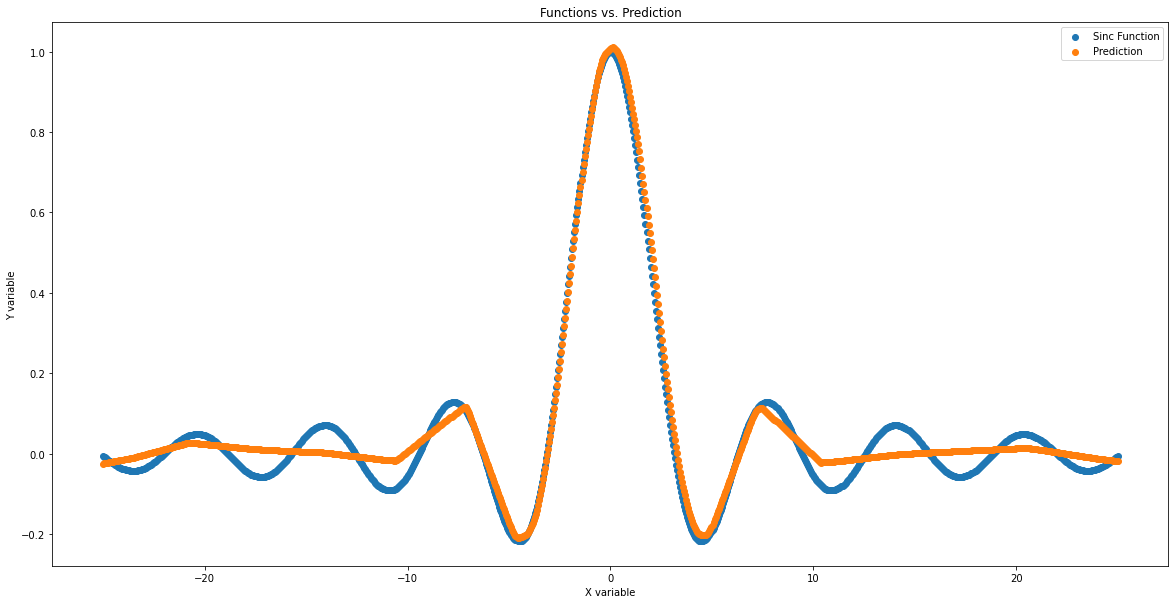

In [37]:
# Lets plot the results
plt.figure(figsize=[20, 10])
plt.scatter(x, y, label='Sinc Function')
plt.scatter(x, y_prediction_torch_baseline, label='Prediction')
plt.title('Functions vs. Prediction')
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.legend()
plt.show()

In [46]:
score_torch_baseline = torch.abs(y_prediction_torch_baseline - y).sum()/len(x_scaled)
score_torch_baseline

tensor(0.0303)

As before, we can see the baseline simpler model cannot approximate the function very well. Let´s try now with a more complex neural network:

In [47]:
class ComplexNeuralNet(nn.Module):
    # Constructor
    def __init__(self, n_input_features):
      super(ComplexNeuralNet, self).__init__()
      self.fc1 = nn.Linear(n_input_features, 256)
      self.fc2 = nn.Linear(256, 256)
      self.fc3 = nn.Linear(256, 128)
      self.fc4 = nn.Linear(128, 128)
      self.fc5 = nn.Linear(128, 64)
      self.fc6 = nn.Linear(64, 64)
      self.fc7 = nn.Linear(64, 32)
      self.fc8 = nn.Linear(32, 32)
      self.fc9 = nn.Linear(32, 1)
      self.relu = nn.ReLU()

    # Definimos el metodo forward
    def forward(self, x):
      out = self.relu(self.fc1(x))
      out = self.relu(self.fc2(out))
      out = self.relu(self.fc3(out))
      out = self.relu(self.fc4(out))
      out = self.relu(self.fc5(out))
      out = self.relu(self.fc6(out))
      out = self.relu(self.fc7(out))
      out = self.relu(self.fc8(out))
      out = self.fc9(out)
      return out

In [48]:
torch_complex = ComplexNeuralNet(1)

learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(torch_complex.parameters(), lr=learning_rate)

In [49]:
for epoch in range(n_epochs):
  # Forward pass and loss calculation
  y_predicted = torch_complex(x_scaled)

  loss = criterion(y_predicted, y)

  # Backward pass
  loss.backward()

  # Update
  optimizer.step()
  optimizer.zero_grad()

  print(f'epoch: {epoch+1}, loss={loss.item():.8f}')

epoch: 1, loss=0.08796518
epoch: 2, loss=0.08477052
epoch: 3, loss=0.08193214
epoch: 4, loss=0.07943273
epoch: 5, loss=0.07689229
epoch: 6, loss=0.07464658
epoch: 7, loss=0.07279911
epoch: 8, loss=0.07089521
epoch: 9, loss=0.06881526
epoch: 10, loss=0.06649743
epoch: 11, loss=0.06408585
epoch: 12, loss=0.06201196
epoch: 13, loss=0.06007268
epoch: 14, loss=0.05864551
epoch: 15, loss=0.05871877
epoch: 16, loss=0.06047587
epoch: 17, loss=0.06098526
epoch: 18, loss=0.06008613
epoch: 19, loss=0.05904998
epoch: 20, loss=0.05848552
epoch: 21, loss=0.05829588
epoch: 22, loss=0.05838581
epoch: 23, loss=0.05855047
epoch: 24, loss=0.05869890
epoch: 25, loss=0.05878899
epoch: 26, loss=0.05881184
epoch: 27, loss=0.05877465
epoch: 28, loss=0.05868771
epoch: 29, loss=0.05855583
epoch: 30, loss=0.05841859
epoch: 31, loss=0.05830140
epoch: 32, loss=0.05822397
epoch: 33, loss=0.05819713
epoch: 34, loss=0.05822450
epoch: 35, loss=0.05826807
epoch: 36, loss=0.05830618
epoch: 37, loss=0.05831928
epoch: 38,

In [50]:
with torch.inference_mode():
  y_prediction_torch_complex = torch_complex(x_scaled)

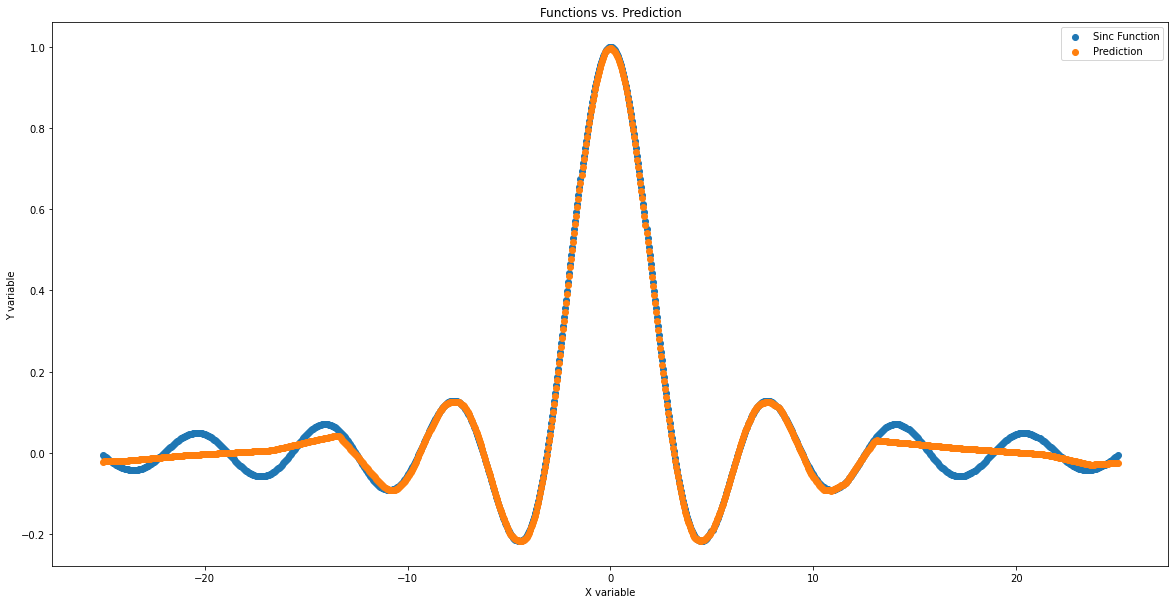

In [51]:
# Lets plot the results
plt.figure(figsize=[20, 10])
plt.scatter(x, y, label='Sinc Function')
plt.scatter(x, y_prediction_torch_complex, label='Prediction')
plt.title('Functions vs. Prediction')
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.legend()
plt.show()

In [52]:
score_torch_complex = torch.abs(y_prediction_torch_complex - y).sum()/len(x_scaled)
score_torch_complex

tensor(0.0161)

In this case, we can see that this model gives a better result than the similar one in Keras, and also that the final loss is smaller than the baseline model, but we can see that still the model has some problems in the oscillating regions. To get a final result, let´s try the same complex model, but with a lot more training epochs:

In [53]:
torch_complex = ComplexNeuralNet(1)

learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(torch_complex.parameters(), lr=learning_rate)

In [54]:
n_epochs=5000

for epoch in range(n_epochs):
  # Forward pass and loss calculation
  y_predicted = torch_complex(x_scaled)

  loss = criterion(y_predicted, y)

  # Backward pass
  loss.backward()

  # Update
  optimizer.step()
  optimizer.zero_grad()

  if(epoch+1)%100 == 0:
    print(f'epoch: {epoch+1}, loss={loss.item():.8f}')

epoch: 100, loss=0.05295109
epoch: 200, loss=0.00140539
epoch: 300, loss=0.00064645
epoch: 400, loss=0.00058051
epoch: 500, loss=0.00094715
epoch: 600, loss=0.00075279
epoch: 700, loss=0.00036253
epoch: 800, loss=0.00043272
epoch: 900, loss=0.00031729
epoch: 1000, loss=0.00027049
epoch: 1100, loss=0.00041350
epoch: 1200, loss=0.00011770
epoch: 1300, loss=0.00016942
epoch: 1400, loss=0.00013973
epoch: 1500, loss=0.00010641
epoch: 1600, loss=0.00004590
epoch: 1700, loss=0.00016579
epoch: 1800, loss=0.00004982
epoch: 1900, loss=0.00019733
epoch: 2000, loss=0.00021280
epoch: 2100, loss=0.00010611
epoch: 2200, loss=0.00003582
epoch: 2300, loss=0.00002449
epoch: 2400, loss=0.00011513
epoch: 2500, loss=0.00004760
epoch: 2600, loss=0.00004096
epoch: 2700, loss=0.00019797
epoch: 2800, loss=0.00005358
epoch: 2900, loss=0.00012012
epoch: 3000, loss=0.00012790
epoch: 3100, loss=0.00002737
epoch: 3200, loss=0.00004282
epoch: 3300, loss=0.00003591
epoch: 3400, loss=0.00012386
epoch: 3500, loss=0.000

In [55]:
with torch.inference_mode():
  y_prediction_torch_complex = torch_complex(x_scaled)

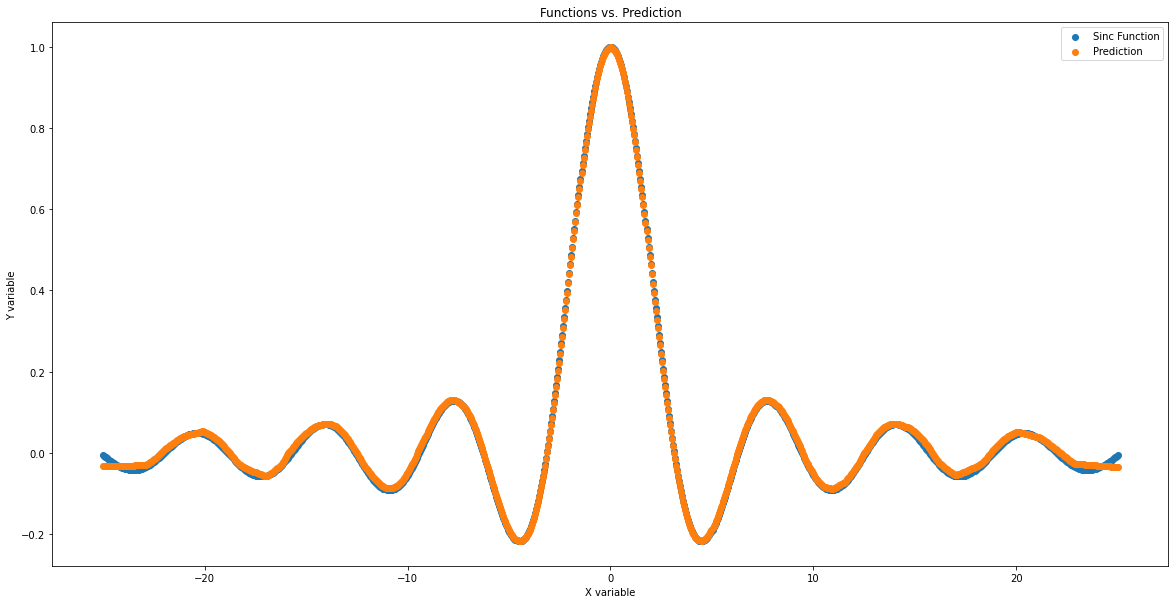

In [56]:
# Lets plot the final result
plt.figure(figsize=[20, 10])
plt.scatter(x, y, label='Sinc Function')
plt.scatter(x, y_prediction_torch_complex, label='Prediction')
plt.title('Functions vs. Prediction')
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.legend()
plt.show()

In [57]:
score_torch_complex = torch.abs(y_prediction_torch_complex - y).sum()/len(x_scaled)
score_torch_complex

tensor(0.0047)

Now, given more epochs, we can let the algorithm optimize the problem enough to get a very los MSE loss and we can see that the neural network is able to reproduce the shape of the function in a very accurate ways. So, this shows how exactly we can use artificial neural networks as Universal Approximators.

I hope you liked this exercise!